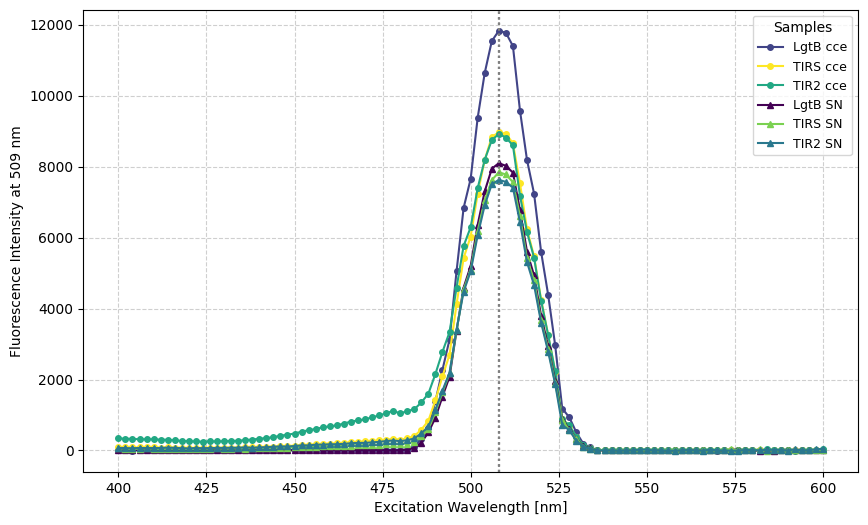

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define file path
excel_file = r'C:\Users\Lenovo\Documents\BT Studies\MASTER PROJECT\Tecan_17.03.25_excitation.xlsx'

# Extract wavelength from line 2 (C2:CY2)
wavelengths = pd.read_excel(excel_file, sheet_name=0, header=None, usecols="C:CY", skiprows=1, nrows=1)
wavelengths = wavelengths.iloc[0].dropna().values
wavelengths = np.array(wavelengths, dtype=float)

# Load fluorescence data from line 3
df = pd.read_excel(excel_file, sheet_name=0, header=None, usecols="B:CY", skiprows=2)

# Set the first column as 'Sample' names
df.columns = ['Sample'] + list(wavelengths)
df['Sample'] = df['Sample'].astype(str)

# Remove any rows where all fluorescence values are NaN
df = df.dropna(how='all')

# Remove unwanted rows
df = df[~df['Sample'].str.contains("Wavel", na=False)]
df = df.dropna()

# Ensure the fluorescence data is numeric
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Find unique sample names
unique_samples = sorted(set(df['Sample']))

# Color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_samples)))
color_map = {sample: color for sample, color in zip(unique_samples, colors)}

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 6))

# Triangle marker for C6-CY6, C7-CY7, C8-CY8
triangle_samples = {"LgtB SN", "TIRS SN", "TIR2 SN"}

# Safe excitation peaks
peaks = {}

# Plot the data for each sample
for row in df.itertuples(index=False):
    sample_name, *values = row
    values = np.array(values, dtype=float)  # Convert to NumPy-Array for calculations
    linestyle = "-"  # Default

    # triangle marker for B6, B7, B8
    if sample_name in triangle_samples:
        marker = "^"
    else:
        marker = "o"  # Circle for other samples

    # Find peak
    peak_idx = np.argmax(values)  # Index of highest intensity
    peak_x = wavelengths[peak_idx]  # Wavelength of the peak
    peaks[sample_name] = peak_x  # Safe the peak

    # Plot data
    ax.plot(wavelengths, values, label=sample_name, color=color_map.get(sample_name, 'black'),
            linestyle=linestyle, marker=marker, markersize=4)  # Markergröße und Markerart

    # Vertical line through peak
    ax.axvline(x=peak_x, linestyle=":", color="gray", alpha=0.7)

# Description of axis and title
ax.set_xlabel("Excitation Wavelength [nm]")
ax.set_ylabel("Fluorescence Intensity at 509 nm")

# Legend & Grid
ax.legend(title="Samples", fontsize=9)
ax.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()